# Vehicle Prices Regression Project - Bendebbache Mohammed Yasser
 in this project i'll be working on a car prices dataset (from CarDekho) and i'll try to apply some regression techniques on it in order to predict the prices of used cars

In [50]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Datasets And Correcting them
in this phase i will look if there's any missing data in the datasets that i'll be working on and i'll try to find a solution for them
and after that i will add some usefull features from "cars_details" to "cars" datasets below in order to improve the regression results

In [51]:
cars=pd.read_csv("cars dataset.csv")
cars_details=pd.read_csv("cars details.csv")

In [6]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
cars_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
print(cars.shape)
print(cars_details.shape)

(4340, 8)
(8128, 13)


the "cars" dataset contains the available used cars and the "cars_details" dataset contains details about all available CarDekho's cars, thats why "cars_details" has more rows(models) and colomns (features) than "cars" dataset as it is shown above.

**Cheking missing data and data types**

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [22]:
print('Missing data in the cars data set :\n{}'.format(cars.isnull().sum()))

Missing data in the cars data set :
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


now we checked that the "cars" dataset is fine and doesn't have any missing values, i will just have to convert categorical features such as (owner, seller_type...etc) to numeric type later.
let's check the "cars_details" dataset now:

In [6]:
cars_details.info()
cars_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
print('Missing data in the cars_details data set :\n{}'.format(cars_details.isnull().sum()))

Missing data in the cars_details data set :
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


the "cars_details" dataset has alot of missing data as you can see in (mileage, engine..etc), and since i dont have another file to get these information from. i will just drop/remove the car models who's details are unavailable and not working on them. (in the worst case we're not going to work with 1100 cars out of 4340, so in that case we will work with 3240 cars which is a fine number aswell) 

In [52]:
cars_details.dropna(inplace=True)
cars_details

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [37]:
8128-7906

222

we didnt loose alot of models at the end, only 222 car models has been removed

In [51]:
print('Missing data in the cars_details data set :\n{}'.format(cars_details.isnull().sum()))

Missing data in the cars_details data set :
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


now after we checked that "cars_details" doesnt have nulls, we can merge both of "cars" and "cars_details" datasets in order to add more features to the "cars" one

In [53]:
cars_det = cars_details.drop_duplicates(subset=['name','year','fuel','transmission'])
df = cars.merge(cars_det, how='left', on = ['name','year','fuel','transmission'])
df.drop(['selling_price_y','km_driven_y','seller_type_y','owner_y'],axis=1,inplace=True)
df.rename(columns={'selling_price_x':'selling_price','km_driven_x':'km_driven','seller_type_x':'seller_type','owner_x':'owner'},inplace=True)
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0


In [150]:
print('Missing data in the final cars list data set :\n{}'.format(df.isnull().sum()))

Missing data in the final cars list data set :
name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage          1858
engine           1858
max_power        1858
torque           1858
seats            1858
dtype: int64


as you can see above, some cars model details are not available. so we wont use them

In [54]:
df.dropna(inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner,23.2 kmpl,1248 CC,73.94 bhp,190Nm@ 2000rpm,5.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0


since we got the final dataframe we will be working on, we can now visualise the data in order to understand more how they affect the price of the car

# Explanatory Variables Analysis and Features Engineering :

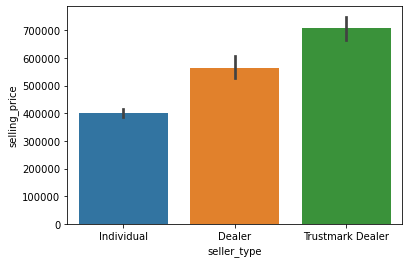

In [12]:
sns.barplot(x='seller_type',y='selling_price',data=df)

here we found that trustmark dealers are selling cars higher than nomal dealers. and normal dealers sell with higher prices than individuals. and it makes sense beacause thats what happening in reality, now lets see the other features

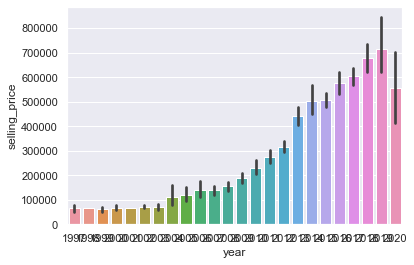

In [153]:
sns.barplot(x='year',y='selling_price',data=df)

here we can see that the newer cars have higher prices than the old ones, for 2020 the prices got lower because the dataset i'm woking on didnt have alot of 2020 cars or maybe the most of them got deleted when i was cleaning the dataset.
the years doesnt look good in the graph, so i will try to change it into car's age which is calculated by substracting the car's year from 2020 and put the result in a new column called age, and the i will drop the year column because it will be useless for now

In [61]:
df['age'] = 2020 - df['year']
df.drop(columns=['year'],inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,Maruti Ritz VDi,225000,90000,Diesel,Individual,Manual,Second Owner,23.2 kmpl,1248 CC,73.94 bhp,190Nm@ 2000rpm,5.0,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,6
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,11
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0,4


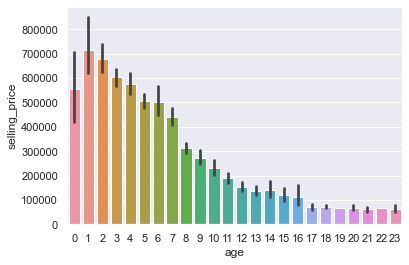

In [155]:
sns.barplot(x='age',y='selling_price',data=df)

now it looks better. the lower the age, the higher the price except for 2020 which i already explained why above. lets continue

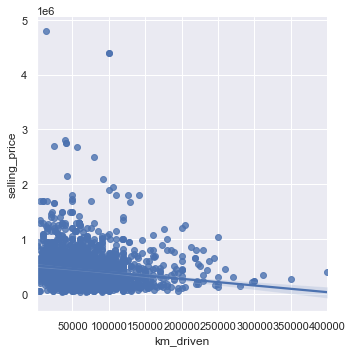

In [156]:
sns.lmplot(x='km_driven',y='selling_price',data=df)

the more the car is driven, the more it's price gets lower

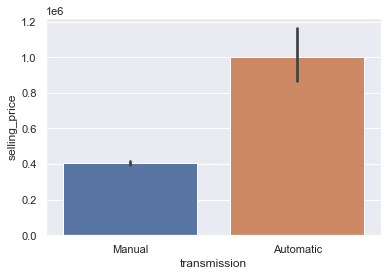

In [157]:
sns.barplot(x='transmission',y='selling_price',data=df)

here we can see that cars with Automatic transmission have higher prices than manual ones.

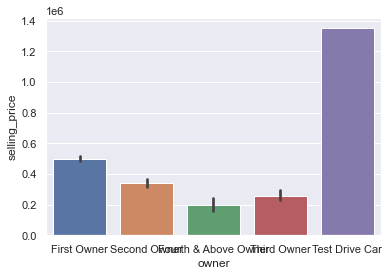

In [172]:
sns.barplot(x='owner',y='selling_price',data=df)

here we notice that test drive cars are the most expensive ones, and then the first owner ones (the first one who's going to use the car) ,second,third and  then forth and above ones

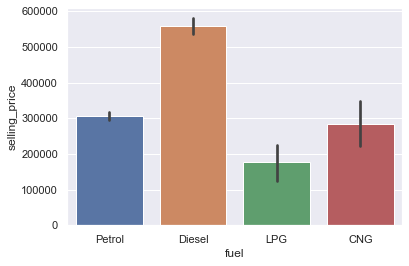

In [158]:
sns.barplot(x='fuel',y='selling_price',data=df)

and here we can see that Diesl cars are the most expensive ones.

 now since we saw how the variables affect on the price, we can start converting the categorical features to numeric type and covert the float feature "seats" into int and remove the extra letters on the features [mileage,engine,max_power] and convert them to int/float and for the "torque" feature i will delete it because i'm not going to use it

In [62]:
df.drop(["torque"], axis=1,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2482 non-null   object 
 1   selling_price  2482 non-null   int64  
 2   km_driven      2482 non-null   int64  
 3   fuel           2482 non-null   object 
 4   seller_type    2482 non-null   object 
 5   transmission   2482 non-null   object 
 6   owner          2482 non-null   object 
 7   mileage        2482 non-null   object 
 8   engine         2482 non-null   object 
 9   max_power      2482 non-null   object 
 10  seats          2482 non-null   float64
 11  age            2482 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 252.1+ KB


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,4.0,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1061 CC,67 bhp,5.0,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,22.32 kmpl,1582 CC,126.32 bhp,5.0,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,5.0,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,25.8 kmpl,1498 CC,98.6 bhp,5.0,6


In [63]:
df['mileage'] = df['mileage'].map(lambda x: x.rstrip('kmpl').rstrip('km/kg'))
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16.1,796 CC,37 bhp,4.0,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18.9,1061 CC,67 bhp,5.0,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,22.32,1582 CC,126.32 bhp,5.0,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,22.7,799 CC,53.64 bhp,5.0,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,25.8,1498 CC,98.6 bhp,5.0,6


In [64]:
df['engine'] = df['engine'].map(lambda x: x.rstrip('CC'))
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16.1,796,37 bhp,4.0,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18.9,1061,67 bhp,5.0,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,22.32,1582,126.32 bhp,5.0,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,22.7,799,53.64 bhp,5.0,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,25.8,1498,98.6 bhp,5.0,6


In [65]:
df['max_power'] = df['max_power'].map(lambda x: x.rstrip('bhp'))
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16.1,796,37,4.0,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,18.9,1061,67,5.0,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,22.32,1582,126.32,5.0,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,22.7,799,53.64,5.0,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,25.8,1498,98.6,5.0,6


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2482 non-null   object 
 1   selling_price  2482 non-null   int64  
 2   km_driven      2482 non-null   int64  
 3   fuel           2482 non-null   object 
 4   seller_type    2482 non-null   object 
 5   transmission   2482 non-null   object 
 6   owner          2482 non-null   object 
 7   mileage        2482 non-null   object 
 8   engine         2482 non-null   object 
 9   max_power      2482 non-null   object 
 10  seats          2482 non-null   float64
 11  age            2482 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 332.1+ KB


In [66]:
df['seats'] = df["seats"].astype("int64")
df['max_power'] = df["max_power"].astype("float")
df['engine'] = df["engine"].astype("int64")
df['mileage'] = df["mileage"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2482 non-null   object 
 1   selling_price  2482 non-null   int64  
 2   km_driven      2482 non-null   int64  
 3   fuel           2482 non-null   object 
 4   seller_type    2482 non-null   object 
 5   transmission   2482 non-null   object 
 6   owner          2482 non-null   object 
 7   mileage        2482 non-null   float64
 8   engine         2482 non-null   int64  
 9   max_power      2482 non-null   float64
 10  seats          2482 non-null   int64  
 11  age            2482 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 252.1+ KB


now after we fixed the data types, we have to start categorizing the object type data like "fuel" and "owner" using "pandas" get_dummies() function in order to start doing regression later

In [67]:
df=pd.get_dummies(df,columns=['fuel','seller_type','transmission','owner'],drop_first=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 4339
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2482 non-null   object 
 1   selling_price                 2482 non-null   int64  
 2   km_driven                     2482 non-null   int64  
 3   mileage                       2482 non-null   float64
 4   engine                        2482 non-null   int64  
 5   max_power                     2482 non-null   float64
 6   seats                         2482 non-null   int64  
 7   age                           2482 non-null   int64  
 8   fuel_Diesel                   2482 non-null   uint8  
 9   fuel_LPG                      2482 non-null   uint8  
 10  fuel_Petrol                   2482 non-null   uint8  
 11  seller_type_Individual        2482 non-null   uint8  
 12  seller_type_Trustmark Dealer  2482 non-null   uint8  
 13  tra

,name,selling_price,km_driven,mileage,engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,60000,70000,16.10,796,37.00,4,13,0,0,1,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,135000,50000,18.90,1061,67.00,5,13,0,0,1,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,600000,100000,22.32,1582,126.32,5,8,1,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,250000,46000,22.70,799,53.64,5,3,0,0,1,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,450000,141000,25.80,1498,98.60,5,6,1,0,0,1,0,1,0,1,0,0


- for fuel types :<br>
    001 : is petrol<br>
    010 : is lgp<br>
    100 : is diesel<br>
    000 : is cng<br>
- for seller types :<br>
    10 : is individual<br>
    01 : is trustmark dealer<br>
    00 : is normal dealer<br>
- for transmission modes :<br>
    1 : is manual<br>
    0 : is automatic<br>
- for owner types:<br>
    0001 : is third<br>
    0010 : is test drive<br> 
    0100 : is second<br>
    1000 : is fourth and above

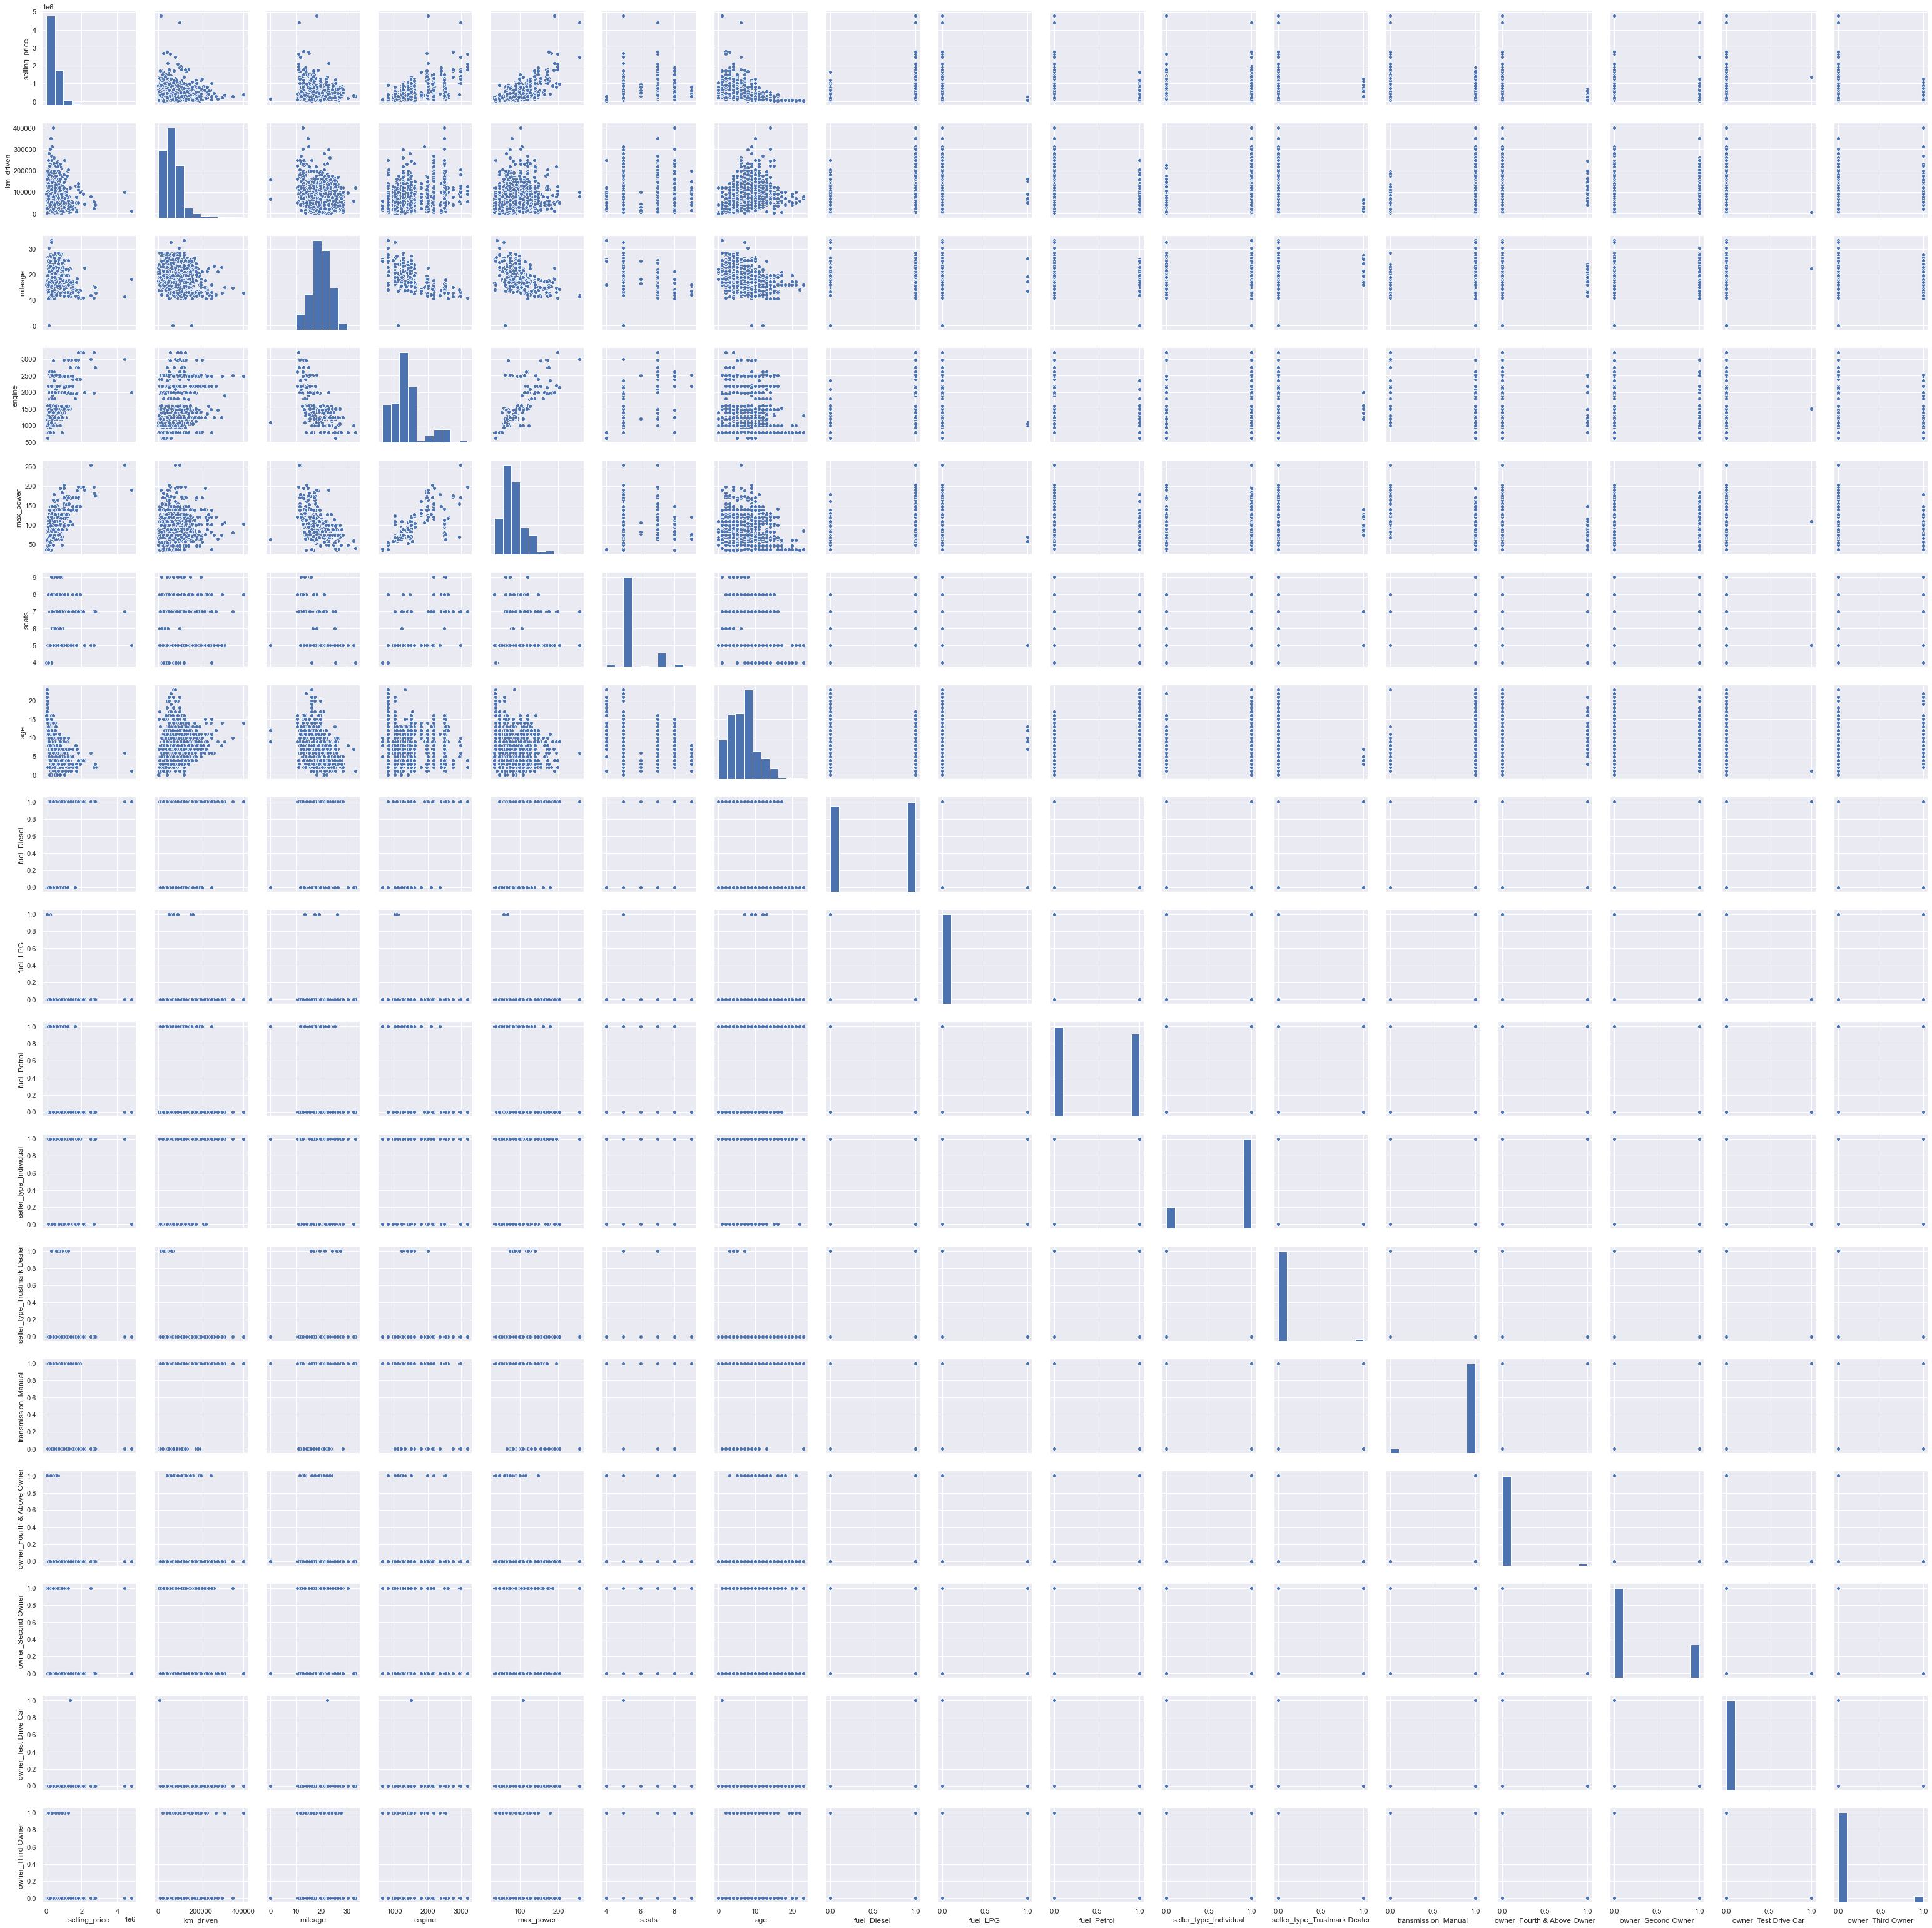

In [175]:
sns.pairplot(df)

 using pairplot() we can visualize the correlations between numerical features, but since we only care about the price in this project i will visual only the ones that conserns it

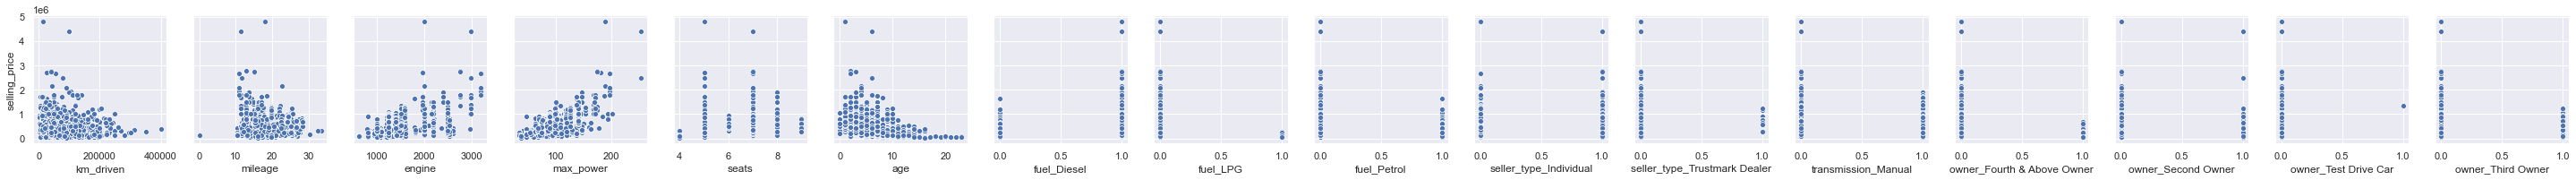

In [178]:
sns.pairplot(data=df,
                  y_vars=['selling_price'],
                  x_vars=['km_driven','mileage','engine','max_power','seats','age','fuel_Diesel','fuel_LPG','fuel_Petrol','seller_type_Individual','seller_type_Trustmark Dealer','transmission_Manual','owner_Fourth & Above Owner','owner_Second Owner','owner_Test Drive Car','owner_Third Owner'])

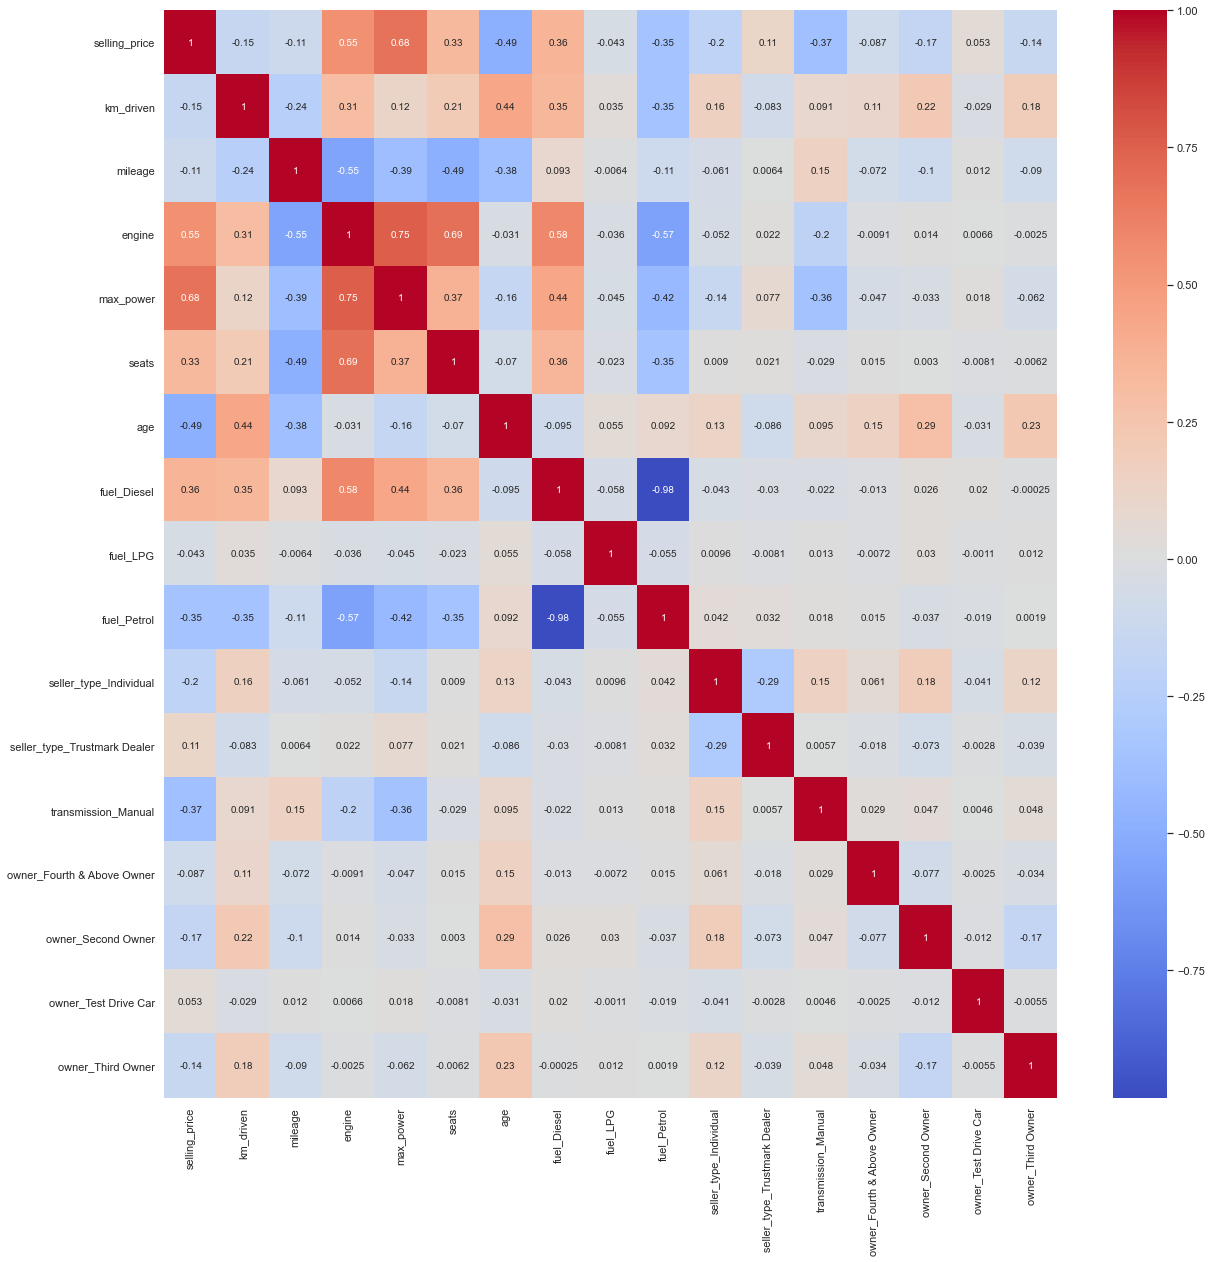

In [192]:
indx=df.corr().index
plt.figure(figsize=(20,20))
sns.heatmap(df[indx].corr(),annot=True,cmap="coolwarm")

the correlation heatmap above show the relation between all the features 

# Detecting Outliers And Correcting The Data : 

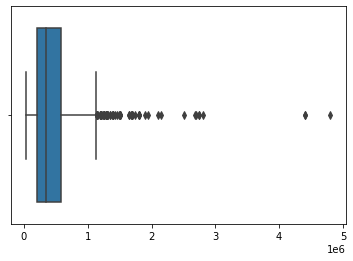

In [68]:
arr = df["selling_price"].to_numpy()
sns.boxplot(x = arr)

outliers are between 1 and 5,
we 're going to use z score to detect outliers in a better way : 

In [82]:
from scipy import stats
z = np.abs(stats.zscore(df.drop(["name"], axis=1)))
print(z)

[[1.08307986 0.03858582 1.00359089 ... 0.60745506 0.02007644 0.27287153]
 [0.86650937 0.42048119 0.2743995  ... 0.60745506 0.02007644 0.27287153]
 [0.47622763 0.72718634 0.6162557  ... 0.60745506 0.02007644 0.27287153]
 ...
 [0.93869954 0.33697938 1.00359089 ... 1.6462123  0.02007644 0.27287153]
 [1.24144334 0.49765284 0.07387186 ... 0.60745506 0.02007644 0.27287153]
 [0.60662479 0.6500147  1.35846837 ... 0.60745506 0.02007644 0.27287153]]


In [83]:
threshold = 3
print(np.where(z > 3))

(array([   7,    7,   15,   15,   18,   18,   19,   21,   21,   21,   23,
         28,   38,   39,   41,   42,   43,   50,   50,   51,   57,   61,
         66,   87,   92,   93,  106,  106,  106,  108,  109,  110,  111,
        111,  113,  115,  121,  131,  146,  162,  175,  175,  183,  184,
        189,  209,  210,  212,  212,  216,  216,  217,  228,  230,  232,
        235,  236,  245,  253,  263,  265,  289,  300,  310,  310,  310,
        310,  317,  318,  318,  318,  318,  319,  320,  321,  321,  322,
        323,  323,  323,  326,  327,  329,  329,  330,  331,  334,  335,
        337,  337,  338,  339,  342,  343,  345,  345,  346,  347,  350,
        351,  353,  353,  354,  355,  368,  373,  374,  377,  383,  393,
        394,  397,  402,  405,  409,  410,  412,  417,  422,  428,  429,
        436,  436,  436,  436,  449,  450,  471,  472,  473,  474,  475,
        478,  486,  486,  486,  486,  488,  494,  501,  524,  525,  527,
        527,  528,  529,  532,  533,  535,  535,  

In [84]:
print(z[7][0])

3.5082144053535846


 the data point 7th record on column ZN is an outlier

In [89]:
print("before : ",df.shape)
df = df[(z < 3).all(axis=1)]
print("after : ",df.shape)

(2482, 18)
(2023, 18)


In [90]:
df.head()

,name,selling_price,km_driven,mileage,engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,60000,70000,16.10,796,37.00,4,13,0,0,1,1,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,135000,50000,18.90,1061,67.00,5,13,0,0,1,1,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,600000,100000,22.32,1582,126.32,5,8,1,0,0,1,0,1,0,0,0,0
3,Datsun RediGO T Option,250000,46000,22.70,799,53.64,5,3,0,0,1,1,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,450000,141000,25.80,1498,98.60,5,6,1,0,0,1,0,1,0,1,0,0


here after cleaning the data from outliers we can sart doing the regression

# Regression : 
### linear regression : 

In [91]:
features=['km_driven','mileage','engine','max_power','seats','age','fuel_Diesel','fuel_LPG','fuel_Petrol','seller_type_Individual','seller_type_Trustmark Dealer','transmission_Manual','owner_Fourth & Above Owner','owner_Second Owner','owner_Test Drive Car','owner_Third Owner']
X=df.loc[:,features]
y=df.loc[:,'selling_price']

here i selected all the features to train our linear regression model because some of the high correlated features like "trasnsmission" type has been categorized using getDummies() and the correlation has changed because of it

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1737, 16)
(1737,)
(745, 16)
(745,)


In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

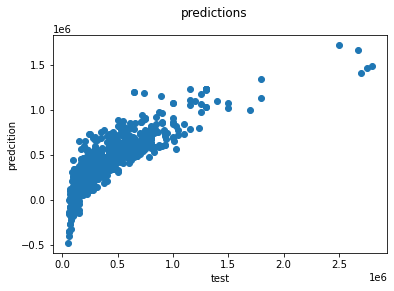

In [95]:
predictions=lr.predict(X_test)
fig = plt.figure()
plt.xlabel('test')
plt.ylabel('predcition')
fig.suptitle('predictions')
plt.scatter(y_test,predictions)

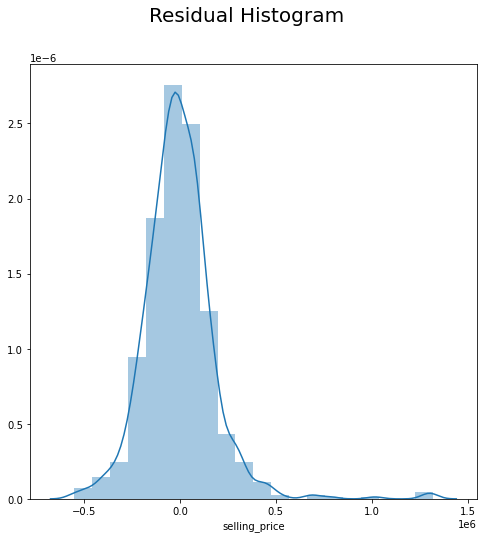

In [96]:
fig=plt.figure(figsize=(8,8))
fig.suptitle('Residual Histogram', fontsize = 20) 
sns.distplot((y_test-predictions),bins=20)

**Evaluation of linear regression (R2 Score) :** 

In [101]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
RMSElr = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Root Mean Square Error:', RMSElr)
R2lr = metrics.r2_score(y_test,predictions)
print('R2 Score :',R2lr)

Mean Squared Error: 35109628350.578735
Mean Absolute Error: 129473.9217659788
Root Mean Square Error: 141378.553056413
R2 Score : 0.7009879464663948


### Decision tree Regressor : 

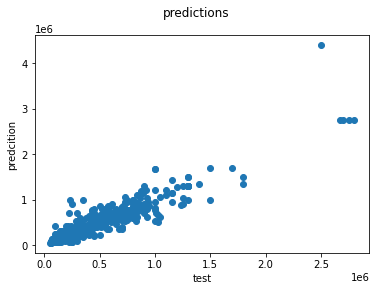

In [21]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

fig = plt.figure()
plt.xlabel('test')
plt.ylabel('predcition')
fig.suptitle('predictions')
plt.scatter(y_test,pred)


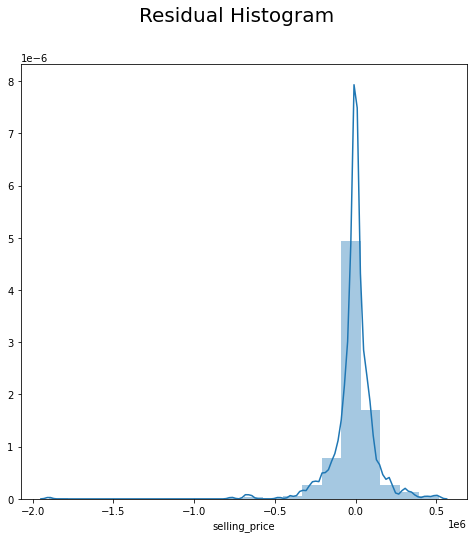

In [23]:
fig=plt.figure(figsize=(8,8))
fig.suptitle('Residual Histogram', fontsize = 20) 
sns.distplot((y_test-pred),bins=20)

**Evaluation of Decision Tree Regressor :** 

In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
RMSEdt = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Root Mean Square Error:', RMSEdt)
R2dt = metrics.r2_score(y_test,pred)
print('R2 Score :',R2dt)

Mean Squared Error: 19987895264.32498
Mean Absolute Error: 74600.11051454137
Root Mean Square Error: 141378.553056413
R2 Score : 0.8297725755134084


### Lasso Regression :

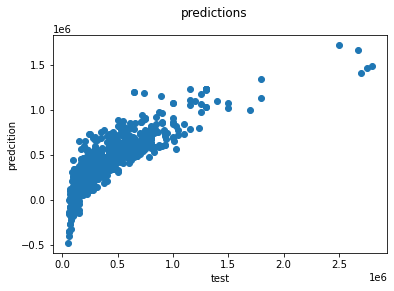

In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
df_lasso=pd.DataFrame(lasso_pred)

fig = plt.figure()
plt.xlabel('test')
plt.ylabel('predcition')
fig.suptitle('predictions')
plt.scatter(y_test,lasso_pred)


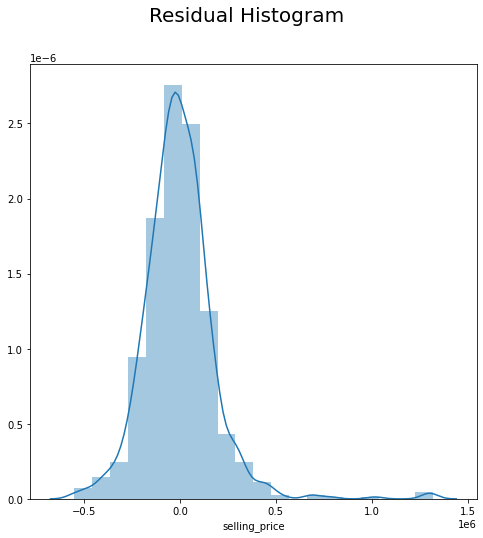

In [30]:
fig=plt.figure(figsize=(8,8))
fig.suptitle('Residual Histogram', fontsize = 20) 
sns.distplot((y_test-lasso_pred),bins=20)

**Evaluation of Lasso Regression :** 

In [31]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_pred))
RMSEls = np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))
print('Root Mean Square Error:', RMSEls)
R2ls = metrics.r2_score(y_test,lasso_pred)
print('R2 Score :',R2ls)

Mean Squared Error: 35109569321.71162
Mean Absolute Error: 129473.3563975895
Root Mean Square Error: 187375.47684185253
R2 Score : 0.7009884491872609


here we got the same score as in linear regression

#### using XGBoost Regressor to improve r2 score :

In [38]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

regressor=xgboost.XGBRegressor()

#Hyperparamter_Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

#train on the RandomSearchCv object to get best estimators
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   19.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=3,
                   para

In [39]:
#getting the best estimators
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
# reinitializing the regressor object with the best probable estimators
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=4, missing=np.nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
# fitting the xgbRegressor on our training data
regressor.fit(X_train,y_train)

# fetching the predictions on our test data
pred2=regressor.predict(X_test)

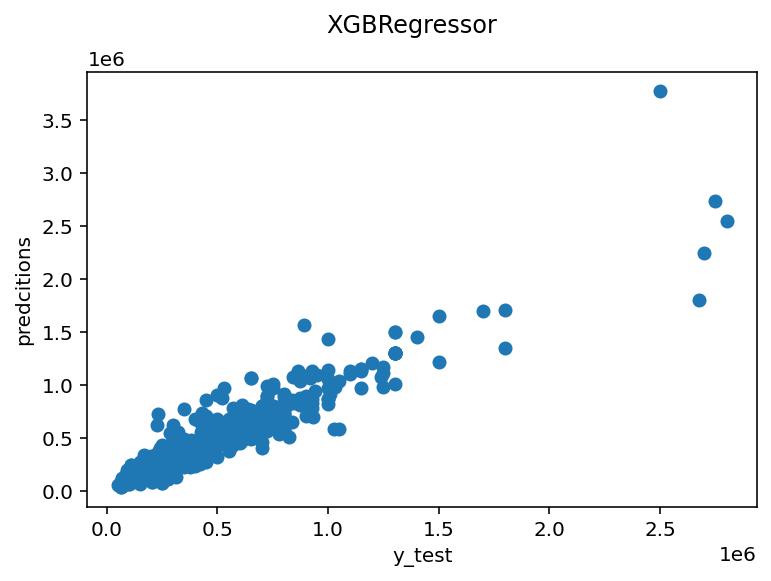

In [42]:

fig = plt.figure()
# Plot-label
fig.suptitle('XGBRegressor')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,pred2)

**Evaluation of XGBoost :** 

In [44]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred2))
RMSExgb = np.sqrt(metrics.mean_squared_error(y_test, pred2))
print('Root Mean Square Error:', RMSExgb)
R2xgb = metrics.r2_score(y_test,predictions2)
print('R2 Score :',R2xgb)

Mean Squared Error: 14432582710.890772
Mean Absolute Error: 66802.40768666107
Root Mean Square Error: 120135.68458576649
R2 Score : 0.8818229188719423


### Comparing r2 scores :

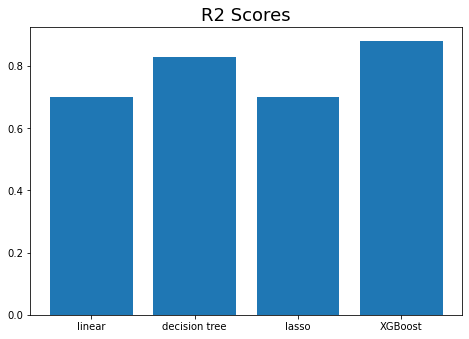

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('R2 Scores', fontsize=18)
langs = ['linear', 'decision tree', 'lasso', 'XGBoost']
scores = [R2lr,R2dt,R2ls,R2xgb]
ax.bar(langs,scores)
plt.show()

from all the regression methods we've done above, we can see that XGBoost in the one that has best results. now lets check how XGBoost has reduced the Root Mean Square Error:

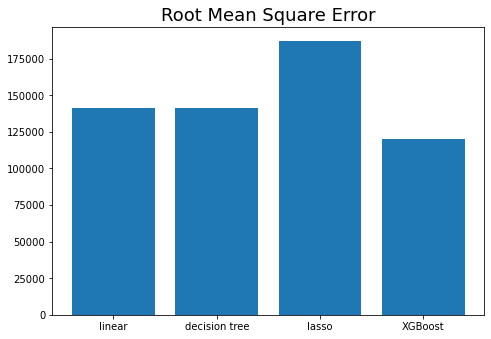

In [103]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Root Mean Square Error', fontsize=18)
langs = ['linear', 'decision tree', 'lasso', 'XGBoost']
scores = [RMSElr,RMSEdt,RMSEls,RMSExgb]
ax.bar(langs,scores)
plt.show()

As you can see here XGBoost has the lowest Root Mean Square Error